Dataset Size: 100, Dimensions: 2
Dataset Size: 500, Dimensions: 2
Dataset Size: 1000, Dimensions: 2
Dataset Size: 10000, Dimensions: 2
Dataset Size: 100, Dimensions: 2
Naive KNN Training Time: 1.9073486328125e-06
Naive KNN Testing Time: 0.0004744529724121094
LSH KNN Training Time: 2.9166364669799805
LSH KNN Testing Time: 0.0032644271850585938
KD-tree KNN Training Time: 0.003240823745727539
KD-tree KNN Testing Time: 0.0005359649658203125
Naive KNN Memory Usage: 1728 bytes
LSH KNN Memory Usage: 144024 bytes
KD-tree KNN Memory Usage: 1848 bytes


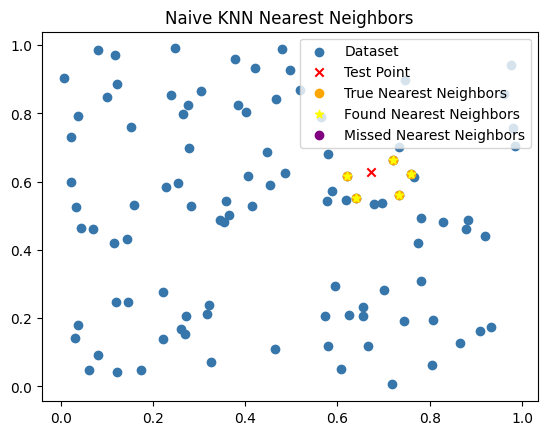

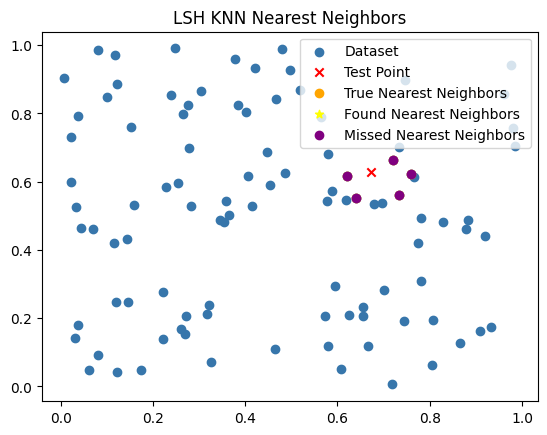

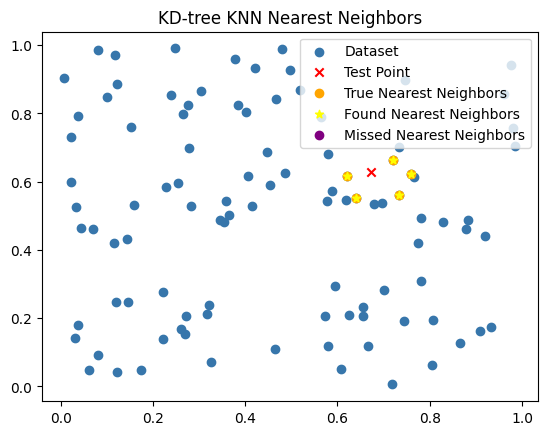

Dataset Size: 500, Dimensions: 2
Naive KNN Training Time: 2.384185791015625e-06
Naive KNN Testing Time: 0.0009629726409912109
LSH KNN Training Time: 3.624034881591797
LSH KNN Testing Time: 0.00335693359375
KD-tree KNN Training Time: 0.0032701492309570312
KD-tree KNN Testing Time: 0.0005295276641845703
Naive KNN Memory Usage: 8128 bytes
LSH KNN Memory Usage: 584841 bytes
KD-tree KNN Memory Usage: 8248 bytes


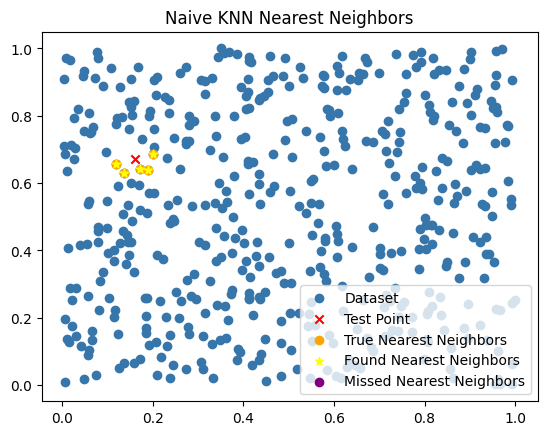

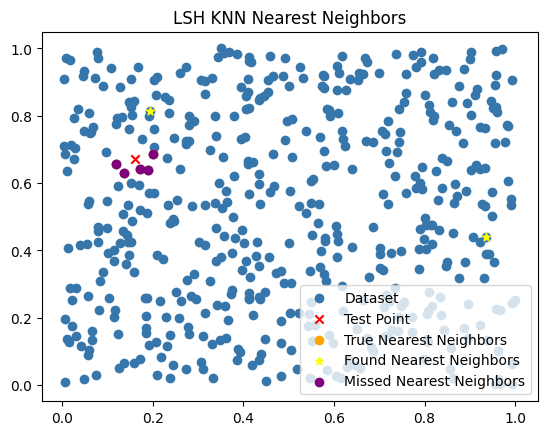

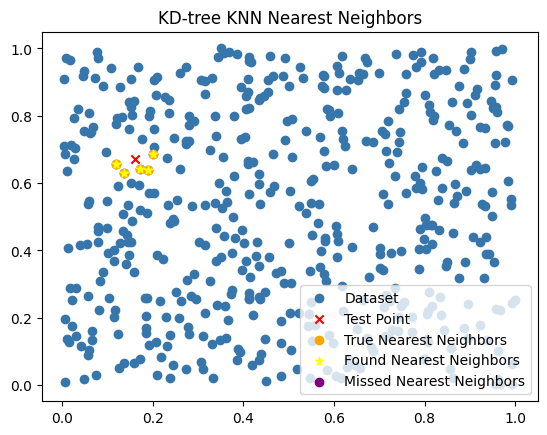

Dataset Size: 1000, Dimensions: 2
Naive KNN Training Time: 2.6226043701171875e-06
Naive KNN Testing Time: 0.001630544662475586
LSH KNN Training Time: 2.9512953758239746
LSH KNN Testing Time: 0.003899812698364258
KD-tree KNN Training Time: 0.003320932388305664
KD-tree KNN Testing Time: 0.000545501708984375
Naive KNN Memory Usage: 16128 bytes
LSH KNN Memory Usage: 954571 bytes
KD-tree KNN Memory Usage: 16248 bytes


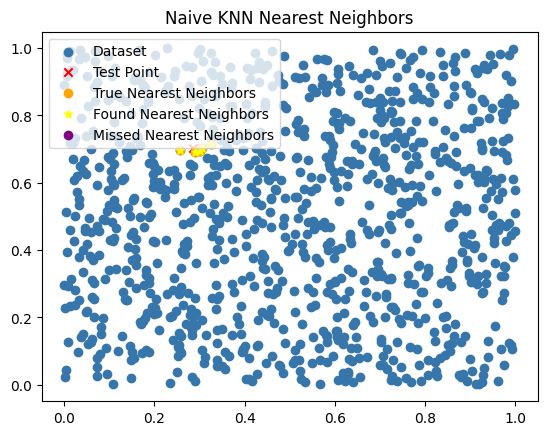

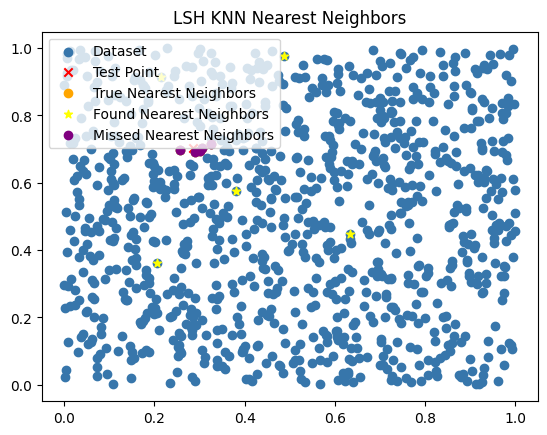

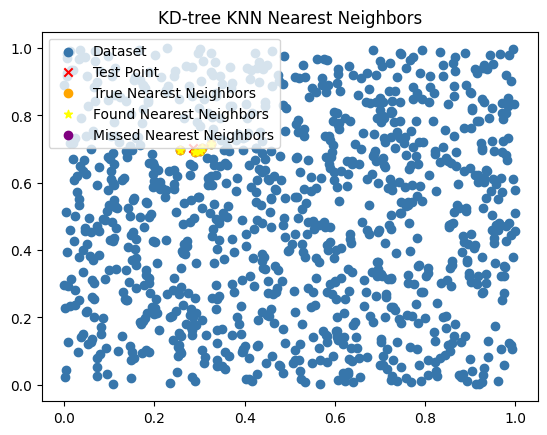

Dataset Size: 10000, Dimensions: 2
Naive KNN Training Time: 3.0994415283203125e-06
Naive KNN Testing Time: 0.016453981399536133
LSH KNN Training Time: 3.87190842628479
LSH KNN Testing Time: 0.004332780838012695
KD-tree KNN Training Time: 0.0033223628997802734
KD-tree KNN Testing Time: 0.000545501708984375
Naive KNN Memory Usage: 160128 bytes
LSH KNN Memory Usage: 2417581 bytes
KD-tree KNN Memory Usage: 160248 bytes


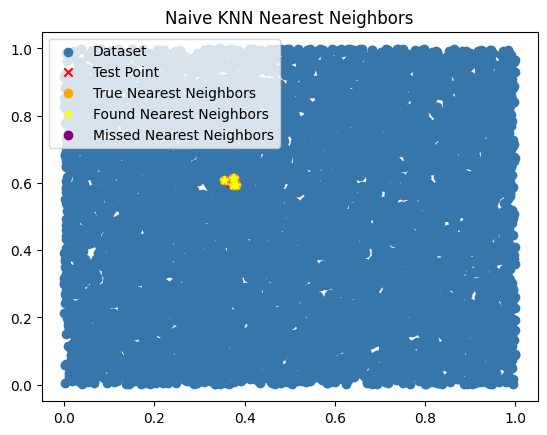

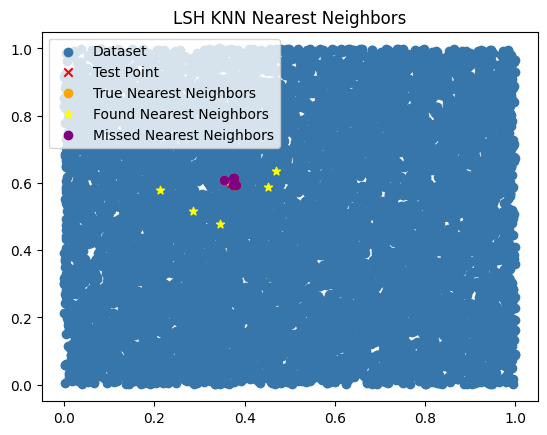

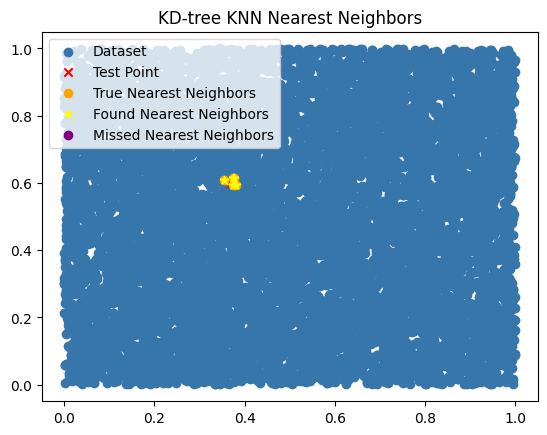

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import sys

# Generate random dataset
def generate_random_dataset(N, D):
    return np.random.rand(N, D)

# Naive KNN implementation
class NaiveKNN:
    def __init__(self, train_data):
        self.train_data = train_data

    def query(self, test_point, K):
        distances = np.sqrt(np.sum((self.train_data - test_point)**2, axis=1))
        nearest_indices = np.argsort(distances)[:K]
        return nearest_indices

# LSH KNN implementation
class LSH:
    def __init__(self, train_data, num_tables=10, num_projections=10):
        self.train_data = train_data
        self.num_tables = num_tables
        self.num_projections = num_projections
        self.hash_tables = []
        self.hash_train_data()

    def hash_train_data(self):
        N, D = self.train_data.shape
        for _ in range(self.num_tables):
            hash_table = {}
            for i in range(N):
                hash_value = self.hash_point(self.train_data[i])
                if hash_value not in hash_table:
                    hash_table[hash_value] = []
                hash_table[hash_value].append(i)
            self.hash_tables.append(hash_table)

    def hash_point(self, point):
        hash_value = ''
        for _ in range(self.num_projections):
            random_projection = np.random.randn(point.shape[0])
            projection_value = np.dot(point, random_projection) > 0
            hash_value += str(int(projection_value))
        return hash_value

    def query(self, test_point, K):
        candidate_indices = set()
        for hash_table in self.hash_tables:
            hash_value = self.hash_point(test_point)
            if hash_value in hash_table:
                candidate_indices.update(hash_table[hash_value])
        distances = np.sqrt(np.sum((self.train_data[list(candidate_indices)] - test_point)**2, axis=1))
        nearest_indices = np.array(list(candidate_indices))[np.argsort(distances)[:K]]
        return nearest_indices

# KD-tree KNN implementation
class KDTreeKNN:
    def __init__(self, train_data):
        self.tree = KDTree(train_data)

    def query(self, test_point, K):
        distances, indices = self.tree.query(test_point, k=K)
        return indices
N_values = [100, 500, 1000, 10000]  # Dataset sizes
D_values = [2]         # Number of dimensions
K = 5                         # Number of nearest neighbors to find

for N in N_values:
    for D in D_values:
        print(f"Dataset Size: {N}, Dimensions: {D}")
        # Generate dataset
        dataset = generate_random_dataset(N, D)

        # Generate test data
        test_data = generate_random_dataset(10, D)
# Measure time taken for training and testing
def measure_time1(model, train_data, test_data, K):
    start_time = time.time()
    # Train model (if applicable)
    NaiveKNN(train_data=dataset)
    training_time = time.time() - start_time

    start_time = time.time()
    for test_point in test_data:
        # Test model
        model.query(test_point, K)
    testing_time = time.time() - start_time

    return training_time, testing_time

def measure_time2(model, train_data, test_data, K):
    start_time = time.time()
    # Train model (if applicable)
    LSH(train_data=dataset)
    training_time = time.time() - start_time

    start_time = time.time()
    for test_point in test_data:
        # Test model
        model.query(test_point, K)
    testing_time = time.time() - start_time

    return training_time, testing_time

def measure_time3(model, train_data, test_data, K):
    start_time = time.time()
    # Train model (if applicable)
    KDTreeKNN(train_data=dataset)
    training_time = time.time() - start_time

    start_time = time.time()
    for test_point in test_data:
        # Test model
        model.query(test_point, K)
    testing_time = time.time() - start_time

    return training_time, testing_time

import sys

def measure_memory_usage(model):
    memory_usage = 0
    if isinstance(model, NaiveKNN) or isinstance(model, LSH):
        memory_usage += sys.getsizeof(model.train_data)
    elif isinstance(model, KDTreeKNN):
        memory_usage += sys.getsizeof(model.tree.data)  # Memory for storing the KD-tree data
        memory_usage += sys.getsizeof(model.tree)       # Memory for the KD-tree structure
    if isinstance(model, LSH):
        for hash_table in model.hash_tables:
            for key, value in hash_table.items():
                memory_usage += sys.getsizeof(key) + sys.getsizeof(value)
    return memory_usage

# Visualize dataset and nearest neighbors
# def visualize(dataset, nearest_indices, test_point, K, title):
#     plt.scatter(dataset[:, 0], dataset[:, 1], color='#3776ab', label='Dataset')
#     plt.scatter(test_point[0], test_point[1], color='r', label='Test Point')
#     nearest_points = dataset[nearest_indices.astype(int)]
#     plt.scatter(nearest_points[:, 0], nearest_points[:, 1], color='green', marker = "*", label='Nearest Neighbors')
#     plt.title(title)
#     plt.legend()
#     plt.show()

def visualize_missed_neighbors(dataset, true_nearest_indices, found_nearest_indices, test_point, K, title):
    plt.scatter(dataset[:, 0], dataset[:, 1], color='#3776ab', label='Dataset')
    plt.scatter(test_point[0], test_point[1], color='red', marker='x', label='Test Point')
    true_nearest_points = dataset[true_nearest_indices.astype(int)]
    found_nearest_points = dataset[found_nearest_indices.astype(int)]
    missed_nearest_points = true_nearest_points[~np.isin(true_nearest_points, found_nearest_points).all(axis=1)]
    plt.scatter(true_nearest_points[:, 0], true
                _nearest_points[:, 1], color='orange', label='True Nearest Neighbors')
    plt.scatter(found_nearest_points[:, 0], found_nearest_points[:, 1], color='yellow', marker = "*", label='Found Nearest Neighbors')
    plt.scatter(missed_nearest_points[:, 0], missed_nearest_points[:, 1], color='purple', label='Missed Nearest Neighbors')
    plt.title(title)
    plt.legend()
    plt.show()

# Main function
def main():
    N_values = [100, 500, 1000, 10000]  # Dataset sizes
    D_values = [2]         # Number of dimensions
    K = 5                         # Number of nearest neighbors to find

    for N in N_values:
        for D in D_values:
            print(f"Dataset Size: {N}, Dimensions: {D}")
            # Generate dataset
            dataset = generate_random_dataset(N, D)

            # Generate test data
            test_data = generate_random_dataset(10, D)

            # Naive KNN
            naive_model = NaiveKNN(train_data=dataset)
            naive_training_time, naive_testing_time = measure_time1(naive_model, dataset, test_data, K)

            # LSH KNN
            lsh_model = LSH(train_data=dataset)
            lsh_training_time, lsh_testing_time = measure_time2(lsh_model, dataset, test_data, K)

            # KD-tree KNN
            kdtree_model = KDTreeKNN(train_data=dataset)
            kdtree_training_time, kdtree_testing_time = measure_time3(kdtree_model, dataset, test_data, K)

            # Print training and testing times
            print("Naive KNN Training Time:", naive_training_time)
            print("Naive KNN Testing Time:", naive_testing_time)

            print("LSH KNN Training Time:", lsh_training_time)
            print("LSH KNN Testing Time:", lsh_testing_time)

            print("KD-tree KNN Training Time:", kdtree_training_time)
            print("KD-tree KNN Testing Time:", kdtree_testing_time)

            # Memory usage measurement
            naive_memory_usage = measure_memory_usage(naive_model)
            lsh_memory_usage = measure_memory_usage(lsh_model)
            kdtree_memory_usage = measure_memory_usage(kdtree_model)

            print("Naive KNN Memory Usage:", naive_memory_usage, "bytes")
            print("LSH KNN Memory Usage:", lsh_memory_usage, "bytes")
            print("KD-tree KNN Memory Usage:", kdtree_memory_usage, "bytes")

            # Visualize nearest neighbors for each method
            test_point = test_data[0]

            # Naive KNN
            naive_nearest_indices = naive_model.query(test_point, K)
            visualize_missed_neighbors(dataset, naive_nearest_indices, naive_nearest_indices, test_point, K, 'Naive KNN Nearest Neighbors')

            # LSH KNN
            lsh_nearest_indices = lsh_model.query(test_point, K)
            visualize_missed_neighbors(dataset, naive_nearest_indices, lsh_nearest_indices, test_point, K, 'LSH KNN Nearest Neighbors')

            # KD-tree KNN
            kdtree_nearest_indices = kdtree_model.query(test_point, K)
            visualize_missed_neighbors(dataset, naive_nearest_indices, kdtree_nearest_indices, test_point, K, 'KD-tree KNN Nearest Neighbors')

if __name__ == "__main__":
    main()

